##This script creates a new choice set centered around the trial of subjective equality in the CRDM task.

- It uses data derived from the utility model and the parameter values (alpha and beta) of the subjective value equation:

 ![image.png](https://cdn.jamanetwork.com/ama/content_public/journal/psych/938422/m_yoi190087ea.png?Expires=1691689740&Signature=OvJ06Ayrw5fJLEycmRUj9I6GyITQwp89ZN5rVQDOm8dU1z6ZvhwNCwFV8yKnBDDEgxFqnaUQWgV7viAKHn5NpRdiVPo-Rgc8kjwYTn-0dnbudBGSoeVtaw8gTSIUiLLnWWVj2sPafVJA9NhK3bivpgCt2RLxI2UJRYUuNUmrrx1CFwyJTKYPlljeVSSEZ3Iwc9dNmvZ4p71MmTQSt8a9KcXSmZ0r0IZhQ187TDnqEFIiAN3mv9A7snMUAnhROj0Fg1p5COdoTVA9Z3RVNw8AT8QgJNSKl44244OjAauQwcnETbDdh2NPeCv4NGXYVclFTopaMriRPqUO4y-QPdDQjw__&Key-Pair-Id=APKAIE5G5CRDK6RD3PGA)

- With those parameters (for now, only alpha) it finds the trial nearest to subjective equality (*i.e* the trial where it is the same to the participant to choose the certain amount v.s the lottery --> *P(choosing) aprox 0.5*
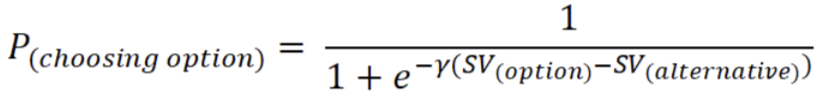
- Then, it creates a new choice set centered around the subjective equality trial (work in progress).  

# 0. Import the relevant packages

In [17]:
import pandas as pd
import os

# 3. Creating the choice set
From   
![image.png](https://cdn.jamanetwork.com/ama/content_public/journal/psych/938422/m_yoi190087ea.png?Expires=1691689740&Signature=OvJ06Ayrw5fJLEycmRUj9I6GyITQwp89ZN5rVQDOm8dU1z6ZvhwNCwFV8yKnBDDEgxFqnaUQWgV7viAKHn5NpRdiVPo-Rgc8kjwYTn-0dnbudBGSoeVtaw8gTSIUiLLnWWVj2sPafVJA9NhK3bivpgCt2RLxI2UJRYUuNUmrrx1CFwyJTKYPlljeVSSEZ3Iwc9dNmvZ4p71MmTQSt8a9KcXSmZ0r0IZhQ187TDnqEFIiAN3mv9A7snMUAnhROj0Fg1p5COdoTVA9Z3RVNw8AT8QgJNSKl44244OjAauQwcnETbDdh2NPeCv4NGXYVclFTopaMriRPqUO4y-QPdDQjw__&Key-Pair-Id=APKAIE5G5CRDK6RD3PGA)

We now have all the elements to calculate subjective value.


In [18]:
cols = ['crdm_lott_amt', 'crdm_lott_p', 'crdm_amb_lev', 'alpha', 'beta', 'gamma']

df_indif = pd.DataFrame([[20, 50, 0, 0.495323857, 0.495323857, 4.100226383]], columns= cols)
print(df_indif)
filename = 'csv/example_input.csv'
df_indif.to_csv(filename)

   crdm_lott_amt  crdm_lott_p  crdm_amb_lev     alpha      beta     gamma
0             20           50             0  0.495324  0.495324  4.100226


In [19]:
filename = 'csv/example_input.csv'
df = pd.read_csv(filename)
df

,Unnamed: 0,crdm_lott_amt,crdm_lott_p,crdm_amb_lev,alpha,beta,gamma
0,0,20,50,0,0.495324,0.495324,4.100226


In [20]:
#Declare the variables
p = df['crdm_lott_p'].values[0]/100  #Use sub_df.iloc[0]['A']
v = df['crdm_lott_amt'].values[0]
alpha = df['alpha'].values[0]
beta = df['beta'].values[0]
A= df['crdm_amb_lev'].values[0]

#SV calculation and our probabilities options
sv = (p - beta*A/2)*v**alpha #We need to calculate SV first before doing anything else
p_options = [0.87, 0.75, 0.62, 0.5, 0.38, 0.25, 0.13]

#Confirme the SE structure
print ('The amount to be earned: ' + str(v))
print ('The probability of reward: ' + str(p))
print('The SV of the equivalence trial is ' + str(sv))
print ('The alpha parameter from the model: ' + str(alpha))

The amount to be earned: 20
The probability of reward: 0.5
The SV of the equivalence trial is 2.204962459791904
The alpha parameter from the model: 0.495323857


From the SV, we compute V, using the formula:

$v = \left(\frac{SV}{p-\frac{\beta A}{2}}\right)^\frac{1}{\alpha}$


In [21]:
#Declare the variables
p_options = [0.87, 0.75, 0.62, 0.5, 0.38, 0.25, 0.13]
beta = 0
A= 0
#First, we compute the Subjective indiference trials.

def SE_options(sv, alpha, beta, A): #This function take as parameters SV, alpha, beta and ambiguity level
  valuesP = {} #The output will be an empty dictionary with the probs as keys and rewards as values.
  for p in p_options: #A loop to iterate for all the probabilities optins.
    v_new = (sv / (p-beta*A/2)) ** (1 / alpha)
    if v_new <= 50:  # Exclude v_new values greater than 50
      valuesP[p] = v_new #for every p it includes the calculated value
  return valuesP

new_choicesp = SE_options(sv, alpha,beta,A)
SE_trials = {k: "{:.2f}".format(v) for k, v in new_choicesp.items()}

print('Trials with the same subjective value for all of our Prob options: \n' + str(SE_trials))


Trials with the same subjective value for all of our Prob options: 
{0.87: '6.54', 0.75: '8.82', 0.62: '12.95', 0.5: '20.00', 0.38: '34.81'}


Next, we create new trials by adding and substracting \$1  and  \$2 from the SE trials values.

In [22]:
#Centered around subjective indifference +/- $1 and $2
def centered ():
  cent_trials = {}
  for k,v in SE_trials.items():
    cent_trials[k] = [[float(v) - 2.0],[float(v) - 1.0],[float(v) + 1.0],[float(v) + 2.0]]
  return cent_trials

cent_trials = centered()
print("Trials centered '+/- $1-2' around SE \n" + str(cent_trials))

Trials centered '+/- $1-2' around SE 
{0.87: [[4.54], [5.54], [7.54], [8.54]], 0.75: [[6.82], [7.82], [9.82], [10.82]], 0.62: [[10.95], [11.95], [13.95], [14.95]], 0.5: [[18.0], [19.0], [21.0], [22.0]], 0.38: [[32.81], [33.81], [35.81], [36.81]]}


**Extreme trials:**

To create trials far way from the subjective equality point (SEP). We first calculate the difference between the SEP and the limits (\$0 and \$50) and then creat 5 trials in equal steps (for every probability option).



*   For example, if the SEP is \$20, the difference to reaching \$50 is \$30. So we divide by 6 equal steps. To create options of \$25, \$30, \$35, \$40, \$45
*   To reaching \$0. The difference is \$20. So making 6 steps, the options would be \$16.67, \$13.33, \$10.0, \$6.67, \$3.33.


In [23]:
#Extreme Positive trials
def pos_extreme():
    extrpos = {}
    for k, v in SE_trials.items():
        v = float(v)
        extrpos[k] = []

        diff = 50 - v
        step_amount = diff / 6  # Divide by 6 to get 5 values before 50, excluding the initial value
        vstep = v + step_amount  # Start with the first step after the initial value
        for x in range(5):
            extrpos[k].append(round(vstep,2))
            vstep += step_amount


    return extrpos

extrpos = pos_extreme()
print('Trials in equal steps until reaching $0 \n', extrpos)

Trials in equal steps until reaching $0 
 {0.87: [13.78, 21.03, 28.27, 35.51, 42.76], 0.75: [15.68, 22.55, 29.41, 36.27, 43.14], 0.62: [19.12, 25.3, 31.48, 37.65, 43.82], 0.5: [25.0, 30.0, 35.0, 40.0, 45.0], 0.38: [37.34, 39.87, 42.41, 44.94, 47.47]}


In [24]:
#Extreme Negative trials
SE_trialsP = {0.5: '20.00'}

def neg_extreme():
    extrneg = {}
    for k, v in SE_trials.items():
        v = float(v)
        extrneg[k] = []


        step_amount = v / 6  # Divide by 6 to get 5 values before v
        vstep = v - step_amount  # Start with the first step after the initial value
        for x in range(5):
            extrneg[k].append(round(vstep,2))
            vstep -= step_amount


    return extrneg

extrneg = neg_extreme()
print('Trials in equal steps until $0 \n', extrneg)

Trials in equal steps until $0 
 {0.87: [5.45, 4.36, 3.27, 2.18, 1.09], 0.75: [7.35, 5.88, 4.41, 2.94, 1.47], 0.62: [10.79, 8.63, 6.47, 4.32, 2.16], 0.5: [16.67, 13.33, 10.0, 6.67, 3.33], 0.38: [29.01, 23.21, 17.41, 11.6, 5.8]}


#4. The new choices CSV

In [25]:
# For the SE trials
# Convert the dictionary to a DataFrame
df = pd.DataFrame(list(SE_trials.items()), columns=['p_reward', 'value_reward'])

# Specify the filename for the new CSV file
SE_trialsCSV = 'csv/SE_trials.csv'

# Save the DataFrame to a CSV file
df.to_csv(SE_trialsCSV, index=False)

print(f"CSV file '{SE_trialsCSV}' created successfully.")
pd.read_csv(SE_trialsCSV)

CSV file 'csv/SE_trials.csv' created successfully.


,p_reward,value_reward
0,0.87,6.54
1,0.75,8.82
2,0.62,12.95
3,0.50,20.00
4,0.38,34.81


In [26]:
# For the centered trials
# Convert the dictionary to a DataFrame
df = pd.DataFrame(list(cent_trials.items()), columns=['p_reward', 'value_reward'])
df = df.explode('value_reward')
df = df.explode('value_reward')
 # Unpack the list in 'value_reward' column
# Specify the filename for the new CSV file
cent_trialsCSV = 'csv/cent_trials.csv'

# Save the DataFrame to a CSV file
df.to_csv(cent_trialsCSV, index=False)

print(f"CSV file '{cent_trialsCSV}' created successfully.")
pd.read_csv(cent_trialsCSV)

CSV file 'csv/cent_trials.csv' created successfully.


,p_reward,value_reward
0,0.87,4.54
1,0.87,5.54
2,0.87,7.54
3,0.87,8.54
4,0.75,6.82
5,0.75,7.82
6,0.75,9.82
7,0.75,10.82
8,0.62,10.95
9,0.62,11.95


In [27]:
#For the extreme positvie trials
# Convert the dictionary to a DataFrame
df = pd.DataFrame(list(extrpos.items()), columns=['p_reward', 'value_reward'])
df = df.explode('value_reward')
 # Unpack the list in 'value_reward' column
# Specify the filename for the new CSV file
extrpos_trialsCSV = 'csv/extrpos.csv'

# Save the DataFrame to a CSV file
df.to_csv(extrpos_trialsCSV, index=False)

print(f"CSV file '{extrpos_trialsCSV}' created successfully.")
pd.read_csv(extrpos_trialsCSV)

CSV file 'csv/extrpos.csv' created successfully.


,p_reward,value_reward
0,0.87,13.78
1,0.87,21.03
2,0.87,28.27
3,0.87,35.51
4,0.87,42.76
5,0.75,15.68
6,0.75,22.55
7,0.75,29.41
8,0.75,36.27
9,0.75,43.14


In [28]:
#For the extreme negative trials
# Convert the dictionary to a DataFrame
df = pd.DataFrame(list(extrneg.items()), columns=['p_reward', 'value_reward'])
df = df.explode('value_reward')
 # Unpack the list in 'value_reward' column
# Specify the filename for the new CSV file
extrneg_trialsCSV = 'csv/extrneg.csv'

# Save the DataFrame to a CSV file
df.to_csv(extrneg_trialsCSV, index=False)

print(f"CSV file '{extrneg_trialsCSV}' created successfully.")
pd.read_csv(extrneg_trialsCSV)

CSV file 'csv/extrneg.csv' created successfully.


,p_reward,value_reward
0,0.87,5.45
1,0.87,4.36
2,0.87,3.27
3,0.87,2.18
4,0.87,1.09
5,0.75,7.35
6,0.75,5.88
7,0.75,4.41
8,0.75,2.94
9,0.75,1.47


In [29]:
#Final CSV
SE_trialCSV = pd.read_csv(SE_trialsCSV)
cent_trialCSV = pd.read_csv(cent_trialsCSV)
extrpos_trialCSV = pd.read_csv(extrpos_trialsCSV)
extrneg_trialCSV = pd.read_csv(extrneg_trialsCSV)
#Complete trials CSV
crdm_trials = pd.concat([SE_trialCSV,cent_trialCSV, extrpos_trialCSV,extrneg_trialCSV])
crdm_trialsCSV = 'csv/crdm_trials.csv'
crdm_trials.to_csv(crdm_trialsCSV, index = False)
print(f"CSV file concatenated successfully.")
pd.read_csv(crdm_trialsCSV)

CSV file concatenated successfully.


,p_reward,value_reward
0,0.87,6.54
1,0.75,8.82
2,0.62,12.95
3,0.50,20.00
4,0.38,34.81
...,...,...
70,0.38,29.01
71,0.38,23.21
72,0.38,17.41
73,0.38,11.60


##It's not much but it's honest work
![python](https://plantillasdememes.com/img/plantillas/no-es-mucho-pero-es-trabajo-honesto01569991155.jpg)